## How many messages you have?

In [1]:
import os

from data import Data
my_data = Data(".")

rows = my_data._new_data._iterate_database()
print(f"You have {len(rows)} messaes.")

You have 2141 messaes.


## When do you like to post?

In [2]:
from datetime import datetime

hour_list = []
for row in rows:
    date = row[0]
    date = datetime.fromisoformat(date)
    time = date.time()
    if str(time) != "00:00:00":
        hour = time.hour
        hour_list.append(hour)

In [3]:
hour_dict = {}

for hour in hour_list:
    if hour not in hour_dict.keys():
        hour_dict.update({hour: 0})
    else:
        hour_dict[hour] += 1
        
from pprint import pprint
sorted_x = sorted(hour_dict.items(), key=lambda kv: kv[1], reverse=True)
print([item[0] for item in sorted_x[:3]])

[20, 14, 15]


In [4]:
print("You must love to post after a day. So you post things based on your life, not imagination.")

You must love to post after a day. So you post things based on your life, not imagination.


## What kind of words that you love to use most?

In [5]:
all_text = ""

for row in rows:
    all_text += row[2]

In [14]:
all_text[-500:]

'sdom we once have is to do a review at the old us and the current us, only in this way, we can be optimized and stabilized.回看过去是痛苦的，但忘记过去等于背叛。回看过去是痛苦的，但忘记过去等于背叛。\n\n我自己回看日记的时候，会很难受，我经历了那么多的苦，说了那么多话，有多少意义？还不是当天新鲜，一段时间后那些话语就会沉睡在黑黑的硬盘里，被我遗忘。hi everyone如果有人说你是垃圾，你就大胆地接受它，回到：对！我就是垃圾。\n\n但你的脑袋里应该清楚一个概念，你现在是垃圾，不代表以后是垃圾。你有不成为垃圾的勇气与决心！质疑的艺术：谁统治或即将统治你，你就质疑谁。一个争取劳动权益的节日，硬给搞成了劳动光荣。😒\n\n多干、傻干，不给加班费都干最好。😒五一国际劳动节 是为了纪念1886年美国芝加哥劳工为争取8小时劳动制所做出的牺牲，特此说明学习 大概率和 健身 是一个道理，想一天就有肌肉？No way！想一个月就见成效？想得美！只有持之以恒地锻炼，几个月后，才能看到效果。'

In [40]:
import jieba
jieba.enable_paddle()
words_list = jieba.cut(all_text, cut_all=True)

Paddle enabled successfully......


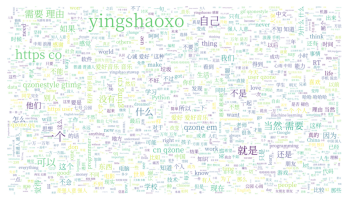

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
from os import path
root = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
font_path = root + '/fonts/SourceHanSerifK-Light.otf'

wl_space_split = " ".join(words_list)
my_wordcloud = WordCloud(
    font_path=font_path,
    background_color="white",
    max_words=2000, 
    max_font_size=100, 
    random_state=42, 
    width=1920, 
    height=1080, 
    margin=2,
)

my_wordcloud.generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(path.join(d, "wordcloud.png"))